In [32]:
import json, os
i = 3
directory = os.getcwd()
monpremierex = json.load(open(f"{directory}/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"{directory}/output/tcl{i}/tcl{i}.json", "r"))

In [33]:
print(monpremierex)

{'name': 'tcl3', 'input_path': 'tcl/input/tcl3', 'output_path': 'tcl/output/tcl3', 'working_dir': 'tcl/input/tcl3', 'initial_temperature': 19.790814770440754, 'coefDeltaTemp': 0.05625, 'coefConso': 1, 'puissanceMin': 0, 'puissanceMax': 4, 'temperature_max': 20.74016230874843, 'temperature_min': 15.46745355866226, 'chroniqueTempExt': [5.161995605604147, 5.618012957745077, 6.310492780294569, 5.39128280121775, 7.503873163261795, 4.882015838031548, 5.456444204703985, 5.997199514631088, 6.91792463014868, 7.043643806484859, 5.348596684177523, 3.95794279307153, 4.468676049396624, 5.974918616789651, 7.457555786914803, 6.010747868068428, 5.27632334120325, 9.383349192063857, 9.13071367465084, 7.656855644869589, 10.233729853799122, 13.385868481231086, 12.179359169675617, 10.339460522855154, 11.530941793615527, 12.798010401501198, 12.488166413418135, 13.467621729439262, 11.882193050179056, 11.902571935557319, 11.622163471515574, 12.53957677153986, 12.685613639734594, 12.65925067361605, 12.77729053

In [34]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]


In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
temp_min_liste =  [temperature_min for k in range(T)]
temp_max_liste =  [temperature_max for k in range(T)]
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

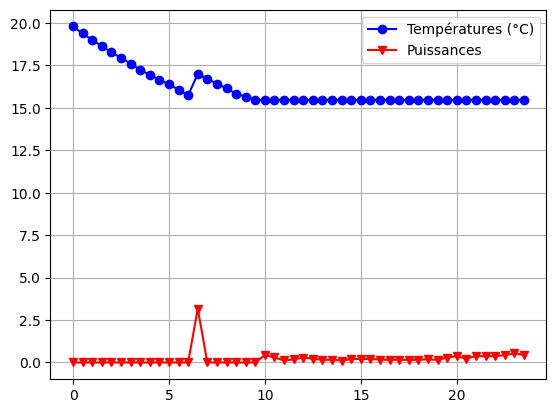

In [37]:
temps = [k/2 for k in range(48)]
plt.plot(temps, temp_profile, label='Températures (°C)', color='blue', marker='')
plt.plot(temps, load, label='Puissances', color='orange', marker='')
plt.plot(temps, temp_min_liste, label='Température min(°C)', color='green', marker='')
plt.plot(temps, temp_max_liste, label='Température max(°C)', color='red', marker='')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
facture_totale=0
for i in range(4):
    tcl_i = json.load(open(f"{directory}/output/tcl{i+1}/tcl{i+1}.json", "r"))
    facture_totale+=tcl_i["cost"]
print(facture_totale)